## MNIST classification with random projections

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

First, we download the data. Mnist is so classic that it is already implemented in Keras. Let us see how data looks like

60000 train samples
10000 test samples
These are numbers corresponding to  5   0   4  and  1


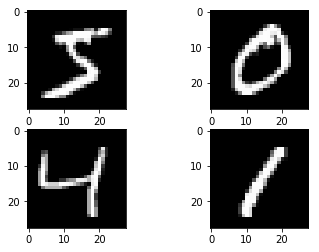

In [2]:
# Download the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# and let us look at the numbers
print("These are numbers corresponding to ",y_train[0]," ",y_train[1]," ",y_train[2]," and ",y_train[3])
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))

Now we need to tranform these two dimensionnal images into a single dimensional vector, which we should also normalize between $0$ and $1$. We also wants to tranform the "y"s into one-hot-encoding type vectors.

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') #convert in float...
x_test = x_test.astype('float32')
x_train /= 255  # .. and normalize
x_test /= 255

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("The cateragories for these image is now encoded as : \n",y_train[0][:],"\n",y_train[1][:],"\n",y_train[2][:],"\n",y_train[3][:],"\n" )

The cateragories for these image is now encoded as : 
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] 
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] 
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] 



MNIST is probably not easy to classify in direct space we shall not even try. Instead, we will try to go into a large dimensional space using random projection followed by a non linearity. Let us see how it works with $1000$ random projection followed by a function $\rm{erf}$. First we create the random matrix:

In [11]:
num_features=5000;
from numpy import sqrt;
from scipy.special import erf

randmatrix=np.random.randn(num_features,784)/sqrt(784); # create a random matrix
A=erf(np.transpose(np.dot(randmatrix,np.transpose(x_train))))# compute the projection
print('Done ! \r')
A.shape

Done ! 


(60000, 5000)

Now, we want to perform a linear regression in the space of $A$, which is a num_featuresx$60000$ matrix. if we perform a simple regression, we have a model where we want to predict label by $Y=A \theta$. The  solution is obtained by writing 
$$\theta=(A^T A)^{-1} A^T Y$$
We thus create the correlation matrix $C=A^T A$ and the projection matrix $P=A^T Y$

In [12]:
CORRELATION=np.dot(np.transpose(A),A)
PROJECTION=np.dot(np.transpose(A),y_train[:,:])

and we compute the coefficient $\theta$ by solving the linear system:

In [13]:
COEFF,_,_,_=np.linalg.lstsq(CORRELATION,PROJECTION)

Now that this is done, we can try to make a prediction for the elements of the test set. First, we need again to perform the projection for these digits:

In [14]:
TEST=erf(np.dot(randmatrix,np.transpose(x_test)))

and we apply our linear prediction in features space

In [15]:
MULTI=np.dot(np.transpose(TEST),COEFF)
MULTI.shape

(10000, 10)

For each of the $10000$ digits, we now have a prediction saying how likely it belongs to the each of the $10$ classes. In order to choose the class, we gonna use the one that returns the largest elements:

In [16]:
PREDICTION=np.argmax(np.transpose(MULTI), axis=0)
LABELTRUE=(np.dot(y_test,np.transpose([0,1,2,3,4,5,6,7,8,9])))
print("Fraction of correct prediction is :",sum(LABELTRUE==PREDICTION)/10000)

Fraction of correct prediction is : 0.9674


This is not bad for a such a simple and fact code. Beside, it is easy to go beyond to 98% with this approach by incerasing the number of projections, and playing with a regularization term.